<a href="https://colab.research.google.com/github/sterlinggutterman/Final-Project/blob/main/Code/decision_trees_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('https://github.com/sterlinggutterman/Final-Project/raw/refs/heads/main/full_df%20(2).parquet')
df.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,reordered_yes/no,order_day,total_order_count,product_name,aisle_id,department_id,aisle,department
0,361493,27,prior,1,3,9,NaN,25718,1,0,no,tuesday,81,Cold Brew Coffee,26,7,coffee,beverages
1,1662354,27,prior,2,2,17,6.0,30776,1,0,no,monday,81,Organic Raw Kombucha Gingerade,31,7,refrigerated,beverages
2,1662354,27,prior,2,2,17,6.0,9604,2,0,no,monday,81,Hibiscus Organic Raw Kombucha,31,7,refrigerated,beverages


In [6]:
print(df['reordered_yes/no'].unique())


[' no' 'yes']


Mean Squared Error: 9.336773867785174
Mean Absolute Error: 2.019370580973962


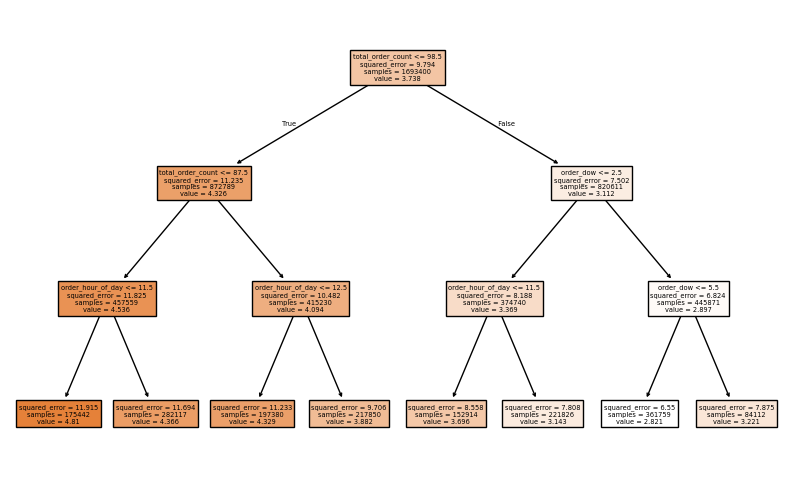

Feature Importances:
 total_order_count    0.840889
order_hour_of_day    0.088006
order_dow            0.071105
aisle_id             0.000000
department_id        0.000000
dtype: float64


In [5]:
# Regression Decision Tree: Predicting Days Until Next Order

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Preparing the dataset
X = df[['order_hour_of_day', 'order_dow', 'total_order_count', 'aisle_id', 'department_id']]
y = df['days_since_prior_order']

# Fill missing values
X = X.fillna(0)
y = y.fillna(0)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the regression tree
reg = DecisionTreeRegressor(max_depth=3, min_samples_split=20, min_samples_leaf=10, random_state=42)
reg.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Visualizing the decision tree
plt.figure(figsize=(10, 6))
plot_tree(reg, feature_names=X.columns, filled=True)
plt.show()

# Feature importance
feature_importances = pd.Series(reg.feature_importances_, index=X.columns)
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))